In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy

In [2]:
%%time
df = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2018.csv')
df2 = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
#df = pd.concat([df2016, df2017], axis=1)

df

<string>:2: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
<string>:2: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 2min 3s


COMPARING STATES VIOLATION COUNT OVER THE YEARS

In [3]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.rename(columns={'Registration_State': 'State'}, inplace=True)
states = pd.DataFrame(df['State'].value_counts()).nlargest(50, columns = ['State'])
states.columns = [col.replace('State', 'States Count 2018') for col in states.columns]
df2.columns = [c.replace(' ', '_') for c in df.columns]
df2.rename(columns={'Registration_State': 'State'}, inplace=True)
states2 = pd.DataFrame(df2['State'].value_counts()).nlargest(50, columns = ['State'])
states2.columns = [col.replace('State', 'States Count 2017') for col in states2.columns]
result = pd.concat([states , states2], axis=1, join='inner')
result.head(10)

,States Count 2018,States Count 2017
NY,3038941,8481061
NJ,328811,925965
PA,100535,285419
FL,52190,144556
CT,51729,141088
IN,46208,80749
MA,29109,85547
VA,24398,72626
MD,22138,61800
NC,19097,55806


VIOLATIONS COUNT AS GROUPED BY STATES : YEAR  2018

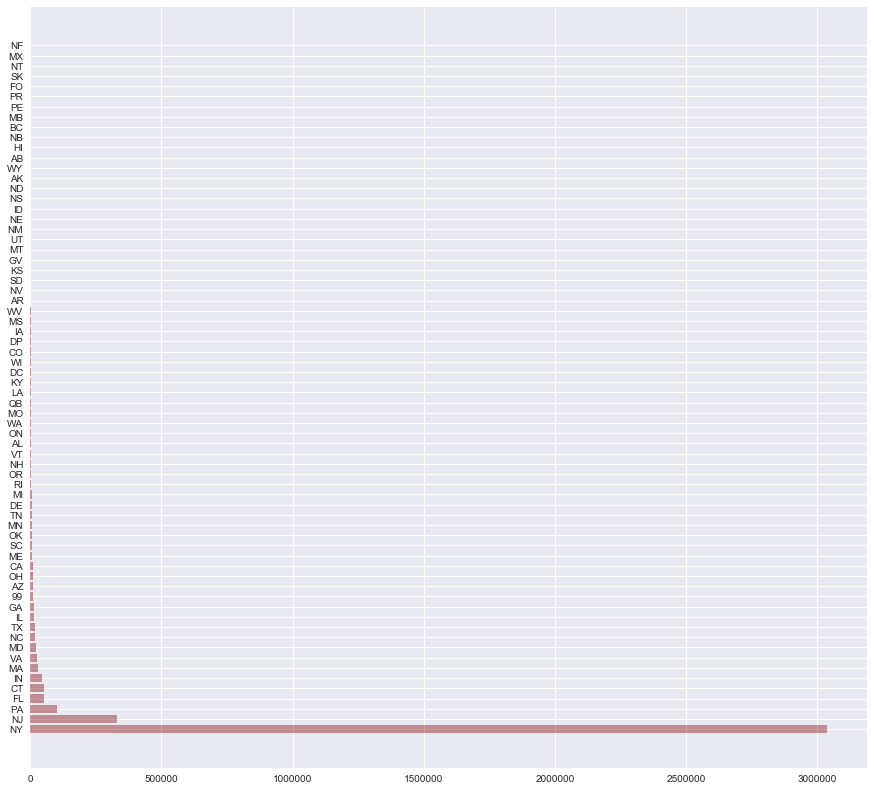

Wall time: 6.02 s


In [4]:
%%time
fig = plt.figure(figsize=(15,14)) 
plt.barh(np.arange(len(df['State'].value_counts().index)), df['State'].value_counts(), color=['maroon'],  alpha=0.4)
plt.yticks(np.arange(len(df['State'].value_counts().index)), df['State'].value_counts().index)
plt.show()

VIOLATIONS COUNT AS GROUPED BY STATES : YEAR 2017

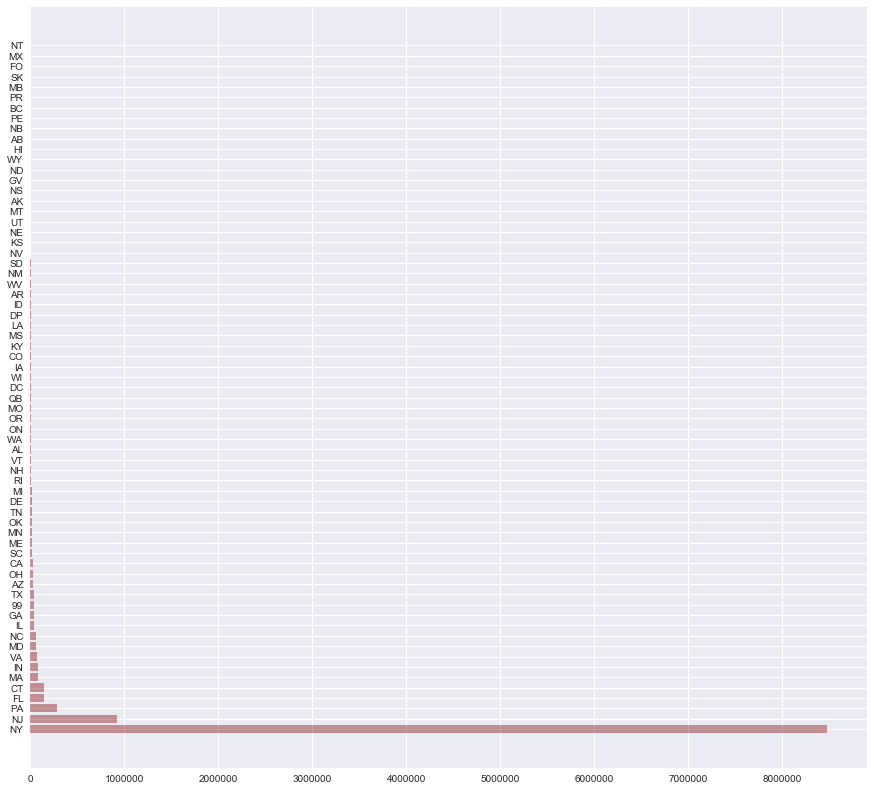

Wall time: 7.66 s


In [5]:
%%time
fig = plt.figure(figsize=(15,14)) 
plt.barh(np.arange(len(df2['State'].value_counts().index)), df2['State'].value_counts(), color=['maroon'],  alpha=0.4)
plt.yticks(np.arange(len(df2['State'].value_counts().index)), df2['State'].value_counts().index)
plt.show()

VIOLATIONS CODES COUNT COMPARISON 2018 AND 2017

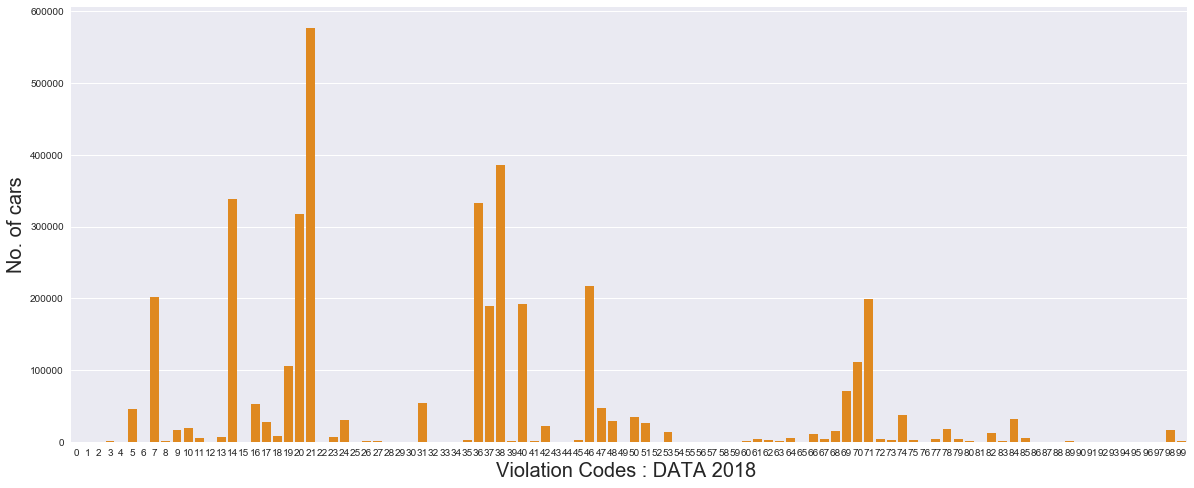

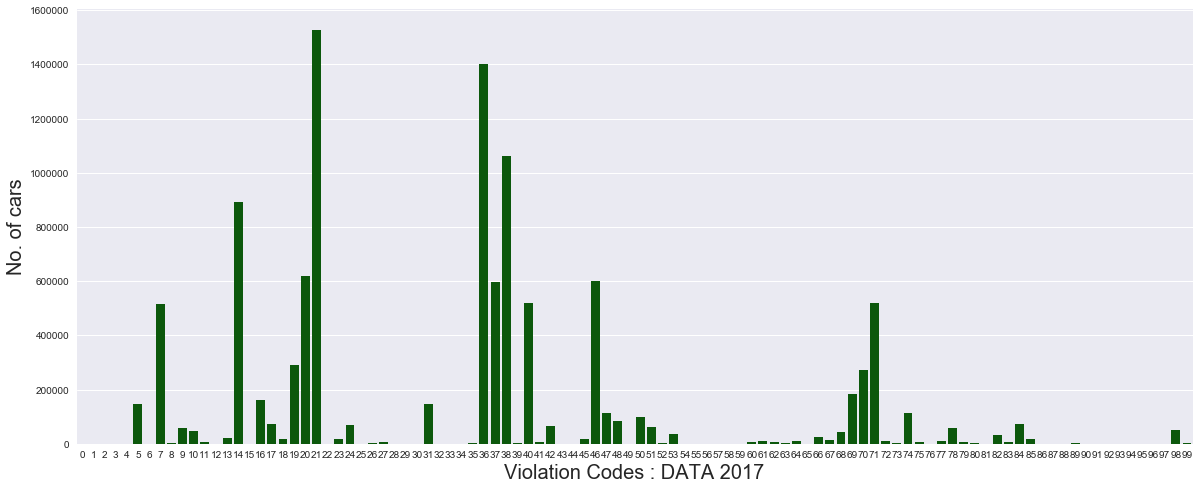

In [6]:
violation_code = df['Violation_Code'].value_counts()
plt.figure(figsize=(20,8))
f = sns.barplot(y=violation_code.values, x=violation_code.index, color = "DarkOrange")
plt.xlabel("Violation Codes : DATA 2018 ", fontsize=20)
plt.ylabel("No. of cars", fontsize=20)
plt.show();

violation_code = df2['Violation_Code'].value_counts()
plt.figure(figsize=(20,8))
f = sns.barplot(y=violation_code.values, x=violation_code.index, color = "Darkgreen")
plt.xlabel("Violation Codes : DATA 2017", fontsize=20)
plt.ylabel("No. of cars", fontsize=20)
plt.show();

VEHICLE-BODY-TYPE COUNT COMPARISON 2018 AND 2017

In [7]:
df_bodytype = pd.DataFrame(df['Vehicle_Body_Type'].value_counts() / len(df)*100).nlargest(10, columns = ['Vehicle_Body_Type'])
df_bodytype.columns = [col.replace('Vehicle_Body_Type', 'Vehicle BodyType 2018') for col in df_bodytype.columns]
df_bodytype2 = pd.DataFrame(df2['Vehicle_Body_Type'].value_counts() / len(df2)*100).nlargest(10, columns = ['Vehicle_Body_Type'])
df_bodytype2.columns = [col.replace('Vehicle_Body_Type', 'Vehicle BodyType 2017') for col in df_bodytype2.columns]
result2 = pd.concat([df_bodytype , df_bodytype2], axis=1, join='inner')
result2

,Vehicle BodyType 2018,Vehicle BodyType 2017
SUBN,33.865763,34.432957
4DSD,28.070005,28.529223
VAN,14.488367,13.070132
DELV,6.757026,6.362383
SDN,3.234602,4.056187
PICK,2.645189,2.430967
2DSD,2.548545,2.539843
REFG,1.322620,0.918141
TRAC,0.866193,0.672108


PARKING TICKETS GIVEN IN DIFFERENT COUNTIES 2018 & 2017

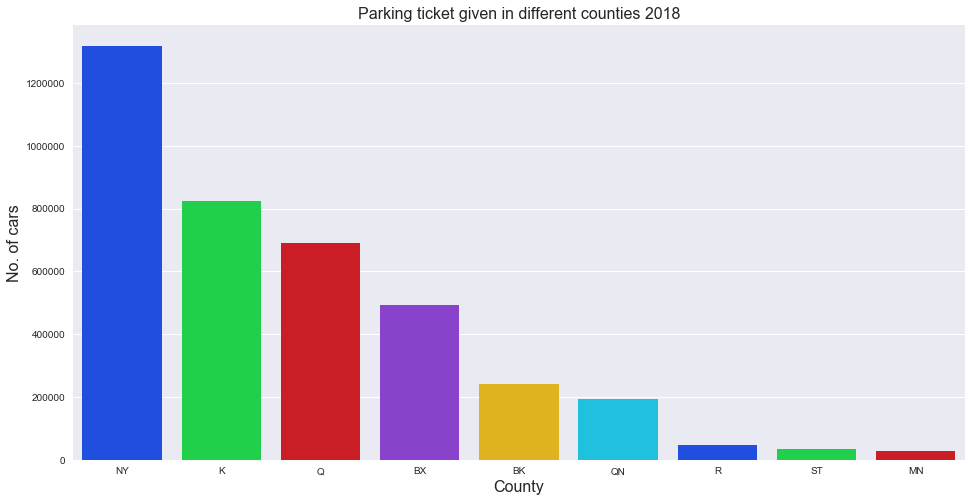

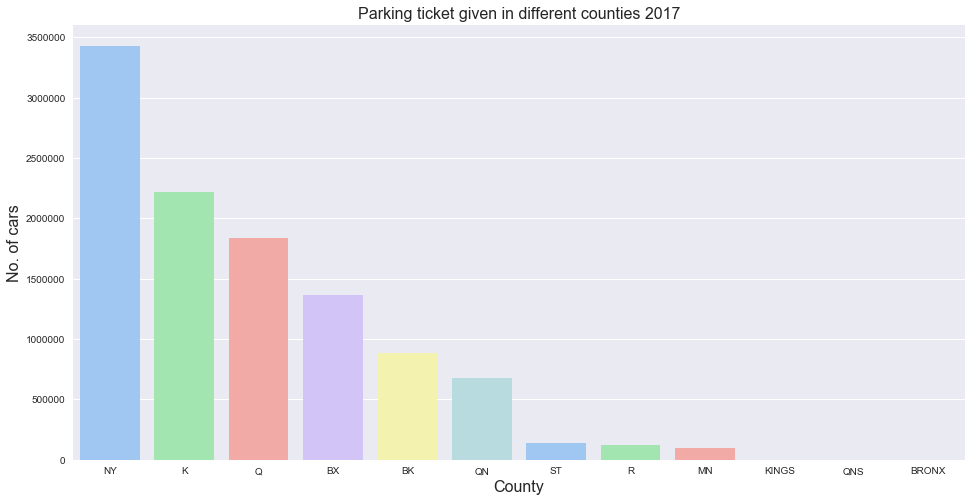

In [8]:
violation_county = df['Violation_County'].value_counts()
plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, palette = "bright")
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties 2018', fontsize=16);
plt.show();

violation_county2 = df2['Violation_County'].value_counts()
plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_county2.values, x=violation_county2.index, palette = "pastel")
# remove labelsMut
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties 2017', fontsize=16);
plt.show();

VIOLATIONS AS PER CAR MANUFACTURE YEAR 

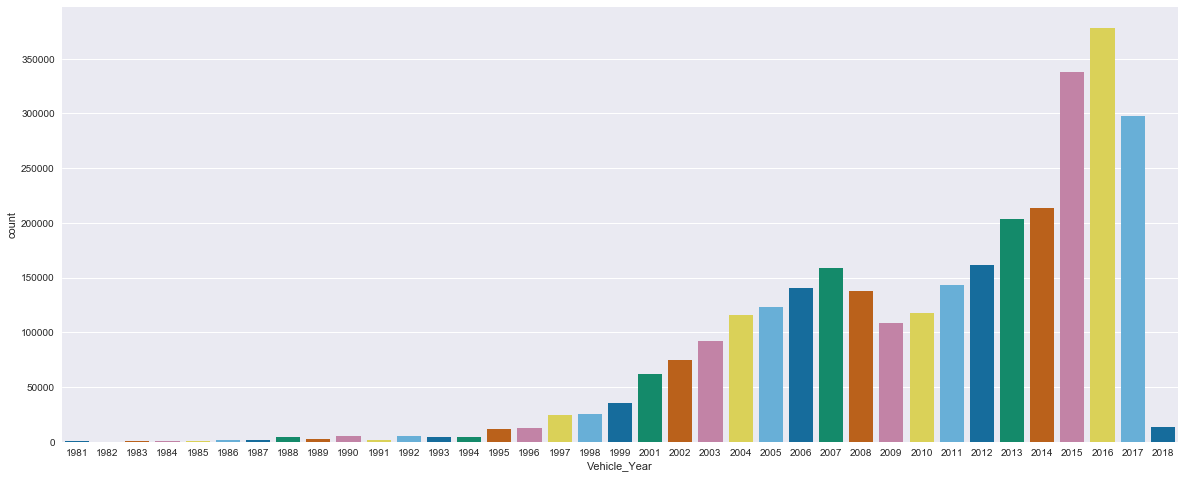

In [9]:
pd.DataFrame(df['Vehicle_Year'].value_counts()).nlargest(10, columns = ['Vehicle_Year'])
plt.figure(figsize=(20,8))
sns.countplot(x = 'Vehicle_Year', data = df.loc[(df['Vehicle_Year']>1980) & (df['Vehicle_Year'] <= 2018)], palette = "colorblind");
plt.show()


